In [411]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
# Load the resume dataset
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [413]:
#  Show shape and sample of the data
print(df.shape ) # (Number of samples, Number of columns)
df.head()  # Display first few rows

(962, 2)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [414]:
# Count the number of resumes per category
counts=df['Category'].value_counts()

In [415]:
labels=df['Category'].unique()

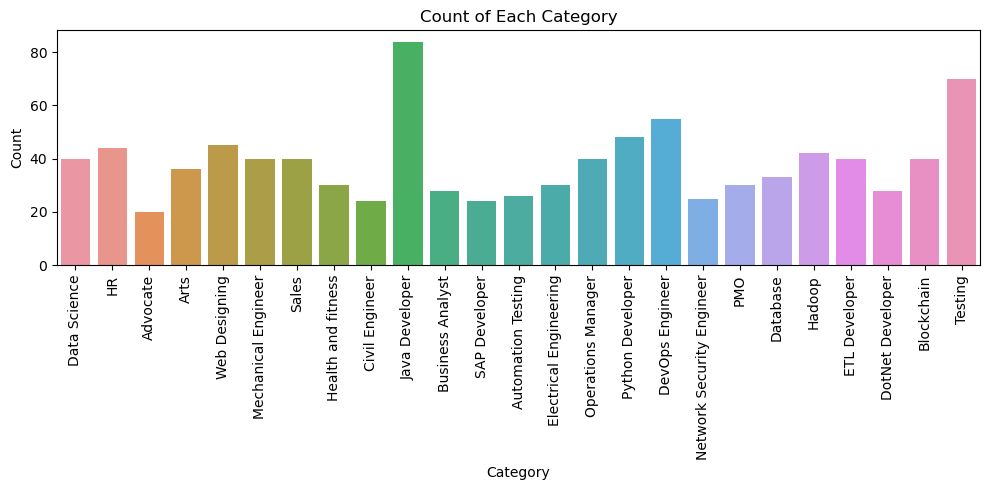

In [416]:
# Bar plot of category counts
plt.figure(figsize=(10,5 ))
sns.countplot(x='Category', data=df)

# Rotate x-axis tick labels by 60 degrees
plt.xticks(rotation=90)

plt.title("Count of Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

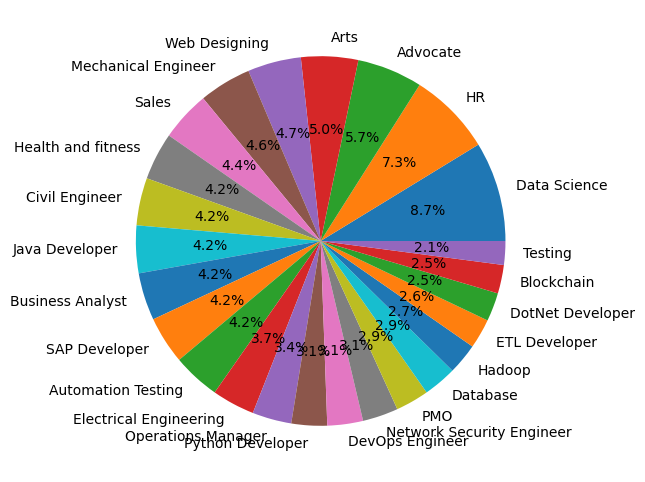

In [417]:
# Pie chart of resume category distribution
plt.figure(figsize=(6,6))
plt.pie(counts,labels=labels,autopct='%1.1f%%')

plt.show()

In [418]:
df['Category'][0]

'Data Science'

In [419]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [420]:
# Cleaning Data
#1 url
#2 hashtags
#3 Mentions
#4 Special tags
#5 Puntuations

In [421]:
# Convert resume text to lowercase
df['Resume']=df['Resume'].str.lower()

In [422]:
import re
# Define a function to clean the resume text
def clean_resume(text):
    cleantext=re.sub('http\S+\S','',text)
    cleantext1=re.sub('@\s+','',cleantext)
    cleantext2=re.sub('#\s+','',cleantext1)
    cleantext3=re.sub(r'<.*?>', '', cleantext2)          # Remove HTML tags
    cleantext4 = re.sub(r'[\r\n]+', ' ', cleantext3)     # Replace newline characters with space
    cleantext5=re.sub(r'[^\x00-\x7F]+', ' ', cleantext4) # Remove non-ASCII characters
    return cleantext5
    

In [423]:
# Apply the cleaning function
df['Resume']=df['Resume'].apply(clean_resume)

In [424]:
# Remove punctuation from resume text
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [425]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [426]:
df['Resume']=df['Resume'].apply(remove_punctuation)

In [427]:
# Remove stopwords using NLTK
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [428]:
stopwords = set(stopwords.words('english'))

In [429]:
# Function to remove stopwords from text
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word.lower() in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    return " ".join(new_text)

In [430]:
df['Resume']=df['Resume'].apply(remove_stopwords)

In [431]:
df['Resume'][10]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm na  bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv  understanding  deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations  dispute services assurance technology assisted review tar technology assisted review assists  accelerating  review process  run

In [432]:
# Encode target categories as numbers
from sklearn.preprocessing import LabelEncoder

In [433]:
le=LabelEncoder()

In [434]:
le.fit(df['Category'])

LabelEncoder()

In [435]:
df['Category']=le.transform(df['Category'])

In [436]:
df

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 may 2017 uitrgpv ...
2,6,areas interest deep learning control system d...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient ms office word bas...
958,23,willingness accept challenges positive think...
959,23,personal skills quick learner eagerness learn...
960,23,computer skills software knowledge mspower poi...


In [437]:
# Convert resume text into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1, 1),max_features=10000,stop_words='english')
tfidf.fit(df['Resume'])



TfidfVectorizer(max_features=10000, stop_words='english')

In [438]:
tfidf_matrix =tfidf.transform(df['Resume'])

In [439]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [440]:
x_train,x_test,y_train,y_test=train_test_split(tfidf_matrix,df['Category'],test_size=0.2,random_state=42 )

In [441]:
x_test.shape

(193, 7882)

In [442]:
# Train a K-Nearest Neighbors (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [443]:
knn=KNeighborsClassifier()

In [444]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [445]:
# Predict on the test data
y_pred=knn.predict(x_test)
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [446]:
# Evaluate model accuracy
accuracy_score(y_test,y_pred)

0.9844559585492227

In [447]:
# Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


<Figure size 1200x800 with 0 Axes>

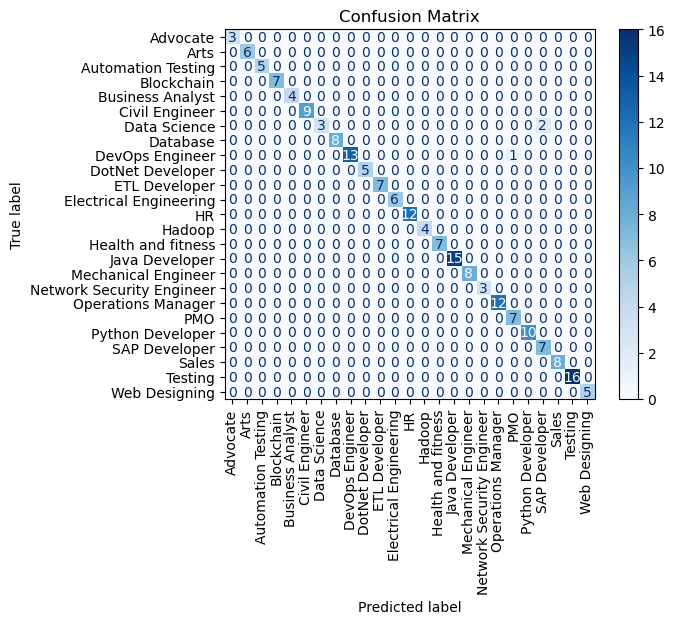

In [448]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(12, 8))
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

In [449]:
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n")
print(report)


Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00 

In [451]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [452]:
knn=pickle.load(open('knn.pkl','rb'))